I will be constructing a multiple linear regression model to predict the Median value of owner-occupied homes in $1000's (MEDV) in the city of Boston. I will be using a model selection algorithm which is known as forward selection. The dataset used can be found at https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

Below is a description of the variables that will be used.

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of African-American people by town

13) LSTAT: % lower status of the population

In [51]:
library(readr)
boston <- read_csv("boston.csv")
boston <- as.data.frame(boston)
head(boston)

Rows: 506 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [52]:
any(is.na(boston)) # to check if there are any missing values

[1] FALSE

In [53]:
mod0 <- lm(MEDV ~ 1, data = boston)
add1(mod0, scope = .~. + CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,42716.30,2246.514,NA,NA
CRIM,1,6440.783,36275.51,2165.815,89.48611,1.173987e-19
ZN,1,5549.737,37166.56,2178.094,75.25764,5.713584e-17
INDUS,1,9995.187,32721.11,2113.635,153.95488,4.900260e-31
NOX,1,7800.126,34916.17,2146.489,112.59148,7.065042e-24
RM,1,20654.416,22061.88,1914.185,471.84674,2.487229e-74
AGE,1,6069.761,36646.53,2170.964,83.47746,1.569982e-18
DIS,1,2668.247,40048.05,2215.877,33.57957,1.206612e-08
RAD,1,6221.141,36495.15,2168.869,85.91428,5.465933e-19


The selection criterion that I will be using is the F value. In this scenario, LSTAT has the biggest F value therefore that will be the first predictor to be added to the modlel.

In [54]:
mod1 <- update(mod0, formula = .~. + LSTAT)
summary(mod1)


Call:
lm(formula = MEDV ~ LSTAT, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
LSTAT       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [55]:
add1(mod1, scope = .~. + CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B, test = "F")
mod2 <- update(mod1, formula = .~. + RM)
summary(mod2)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,19472.38,1851.009,NA,NA
CRIM,1,146.941784,19325.44,1849.176,3.8245814,5.105917e-02
ZN,1,160.323030,19312.06,1848.826,4.1757581,4.152669e-02
INDUS,1,98.737987,19373.64,1850.437,2.5635450,1.099809e-01
NOX,1,4.796151,19467.59,1852.885,0.1239221,7.249664e-01
RM,1,4033.072217,15439.31,1735.577,131.3941769,3.472258e-27
AGE,1,304.252810,19168.13,1845.041,7.9840430,4.906776e-03
DIS,1,772.401520,18699.98,1832.529,20.7763841,6.487838e-06
RAD,1,25.097614,19447.28,1852.357,0.6491446,4.207994e-01



Call:
lm(formula = MEDV ~ LSTAT + RM, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.076  -3.516  -1.010   1.909  28.131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.35827    3.17283  -0.428    0.669    
LSTAT       -0.64236    0.04373 -14.689   <2e-16 ***
RM           5.09479    0.44447  11.463   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.54 on 503 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6371 
F-statistic: 444.3 on 2 and 503 DF,  p-value: < 2.2e-16


In [56]:
add1(mod2, scope = .~. + CRIM + ZN + INDUS + NOX + AGE + DIS + RAD + TAX + PTRATIO + B, test = "F")
mod3 <- update(mod2, formula = .~. + PTRATIO)
summary(mod3)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,15439.31,1735.577,NA,NA
CRIM,1,311.42082,15127.89,1727.266,10.3341091,1.390003e-03
ZN,1,56.55624,15382.75,1735.720,1.8456535,1.748999e-01
INDUS,1,61.08887,15378.22,1735.570,1.9941588,1.585263e-01
NOX,1,14.89818,15424.41,1737.088,0.4848735,4.865454e-01
AGE,1,20.18413,15419.13,1736.915,0.6571341,4.179577e-01
DIS,1,351.15093,15088.16,1725.935,11.6831866,6.819414e-04
RAD,1,180.45295,15258.86,1731.628,5.9367086,1.517523e-02
TAX,1,425.16215,15014.15,1723.447,14.2153531,1.824338e-04



Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4871  -3.1047  -0.7976   1.8129  29.6559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.56711    3.91320   4.745 2.73e-06 ***
LSTAT       -0.57181    0.04223 -13.540  < 2e-16 ***
RM           4.51542    0.42587  10.603  < 2e-16 ***
PTRATIO     -0.93072    0.11765  -7.911 1.64e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.229 on 502 degrees of freedom
Multiple R-squared:  0.6786,	Adjusted R-squared:  0.6767 
F-statistic: 353.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [57]:
add1(mod3, scope = .~. + CRIM + ZN + INDUS + NOX + AGE + DIS + RAD + TAX + B, test = "F")
mod4 <- update(mod3, formula = .~. + DIS)
summary(mod4)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,13727.99,1678.131,NA,NA
CRIM,1,122.5183456,13605.47,1675.595,4.51154608,3.415602e-02
ZN,1,14.9638412,13713.02,1679.580,0.54669822,4.600162e-01
INDUS,1,0.8255101,13727.16,1680.101,0.03012863,8.622688e-01
NOX,1,24.8141695,13703.17,1679.216,0.90722788,3.413103e-01
AGE,1,66.2385591,13661.75,1677.684,2.42908310,1.197340e-01
DIS,1,499.0776112,13228.91,1661.393,18.90087140,1.668467e-05
RAD,1,6.0743021,13721.91,1679.908,0.22177854,6.378931e-01
TAX,1,44.3602000,13683.63,1678.494,1.62416465,2.031029e-01



Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4172  -3.0971  -0.6397   1.8727  27.1088 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.47136    4.07802   6.001 3.77e-09 ***
LSTAT       -0.66544    0.04675 -14.233  < 2e-16 ***
RM           4.22379    0.42382   9.966  < 2e-16 ***
PTRATIO     -0.97365    0.11603  -8.391 4.94e-16 ***
DIS         -0.55193    0.12695  -4.348 1.67e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.139 on 501 degrees of freedom
Multiple R-squared:  0.6903,	Adjusted R-squared:  0.6878 
F-statistic: 279.2 on 4 and 501 DF,  p-value: < 2.2e-16


In [58]:
add1(mod4, scope = .~. + CRIM + ZN + INDUS + NOX + AGE + RAD + TAX + B, test = "F")
mod5 <- update(mod4, formula = .~. + NOX)
summary(mod5)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,13228.91,1661.393,NA,NA
CRIM,1,233.54159,12995.37,1654.381,8.985572,2.856556e-03
ZN,1,144.80753,13084.10,1657.824,5.533721,1.904011e-02
INDUS,1,242.64691,12986.26,1654.026,9.342447,2.358814e-03
NOX,1,759.56355,12469.34,1633.473,30.457237,5.488148e-08
AGE,1,61.36050,13167.55,1661.041,2.329990,1.275350e-01
RAD,1,22.40035,13206.51,1662.536,0.848080,3.575402e-01
TAX,1,240.33789,12988.57,1654.116,9.251900,2.476067e-03
B,1,502.64166,12726.27,1643.793,19.748199,1.088828e-05



Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7765  -3.0186  -0.6481   1.9752  27.7625 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.49920    4.61295   8.129 3.43e-15 ***
LSTAT        -0.58108    0.04794 -12.122  < 2e-16 ***
RM            4.16331    0.41203  10.104  < 2e-16 ***
PTRATIO      -1.04577    0.11352  -9.212  < 2e-16 ***
DIS          -1.18466    0.16842  -7.034 6.64e-12 ***
NOX         -17.99657    3.26095  -5.519 5.49e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.994 on 500 degrees of freedom
Multiple R-squared:  0.7081,	Adjusted R-squared:  0.7052 
F-statistic: 242.6 on 5 and 500 DF,  p-value: < 2.2e-16


In [59]:
add1(mod5, scope = .~. + CRIM + ZN + INDUS + AGE + RAD + TAX + B, test = "F")
mod6 <- update(mod5, formula = .~. + B)
summary(mod6)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,12469.34,1633.473,NA,NA
CRIM,1,141.4332488,12327.91,1629.701,5.724829755,0.0170954897
ZN,1,151.7132046,12317.63,1629.279,6.146059209,0.0134997960
INDUS,1,17.1043214,12452.24,1634.778,0.685423387,0.4081212016
AGE,1,0.2453368,12469.10,1635.463,0.009818115,0.9211094589
RAD,1,53.4806021,12415.86,1633.298,2.149413156,0.1432542522
TAX,1,10.4987989,12458.85,1635.047,0.420496482,0.5169877009
B,1,311.8342301,12157.51,1622.658,12.799107864,0.0003806043



Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX + B, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3352  -2.9006  -0.7175   1.7552  28.0066 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.516970   4.959607   6.153 1.56e-09 ***
LSTAT        -0.545497   0.048415 -11.267  < 2e-16 ***
RM            4.354807   0.410753  10.602  < 2e-16 ***
PTRATIO      -1.012059   0.112597  -8.988  < 2e-16 ***
DIS          -1.159603   0.166619  -6.960 1.08e-11 ***
NOX         -15.842368   3.278907  -4.832 1.81e-06 ***
B             0.009578   0.002677   3.578 0.000381 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.936 on 499 degrees of freedom
Multiple R-squared:  0.7154,	Adjusted R-squared:  0.712 
F-statistic:   209 on 6 and 499 DF,  p-value: < 2.2e-16


In [60]:
add1(mod6, scope = .~. + CRIM + ZN + INDUS + AGE + RAD + TAX, test = "F")
mod7 <- update(mod6, formula = .~. + ZN)
summary(mod7)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,12157.51,1622.658,NA,NA
CRIM,1,68.7669346,12088.74,1621.788,2.8328779,0.092979467
ZN,1,178.7925375,11978.72,1617.161,7.4330732,0.006629321
INDUS,1,8.6365033,12148.87,1624.298,0.3540228,0.552114937
AGE,1,4.8564228,12152.65,1624.456,0.1990099,0.655715099
RAD,1,143.1069294,12014.40,1618.666,5.9318179,0.015219696
TAX,1,0.5470414,12156.96,1624.635,0.0224091,0.881064521



Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX + B + ZN, 
    data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1644  -2.9451  -0.5997   1.7574  27.3581 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.426789   4.928055   6.174 1.38e-09 ***
LSTAT        -0.551446   0.048155 -11.451  < 2e-16 ***
RM            4.183014   0.412967  10.129  < 2e-16 ***
PTRATIO      -0.923697   0.116478  -7.930 1.45e-14 ***
DIS          -1.411732   0.189633  -7.445 4.31e-13 ***
NOX         -15.836738   3.257974  -4.861 1.57e-06 ***
B             0.010002   0.002665   3.754 0.000195 ***
ZN            0.036672   0.013451   2.726 0.006629 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.904 on 498 degrees of freedom
Multiple R-squared:  0.7196,	Adjusted R-squared:  0.7156 
F-statistic: 182.6 on 7 and 498 DF,  p-value: < 2.2e-16


In [61]:
add1(mod7, scope = .~. + CRIM + INDUS + AGE + RAD + TAX, test = "F")
mod8 <- update(mod7, formula = .~. + CRIM)
summary(mod8)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,11978.72,1617.161,NA,NA
CRIM,1,110.7911054,11867.93,1614.459,4.639663079,0.03172122
INDUS,1,8.8588808,11969.86,1618.787,0.367829224,0.54446683
AGE,1,0.1489926,11978.57,1619.155,0.006181819,0.93736291
RAD,1,94.0791543,11884.64,1615.171,3.934266975,0.04786160
TAX,1,7.9899490,11970.73,1618.824,0.331726263,0.56490507



Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX + B + ZN + 
    CRIM, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3476  -2.9305  -0.6927   1.7085  27.4903 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.549705   4.926999   5.998 3.86e-09 ***
LSTAT        -0.531634   0.048854 -10.882  < 2e-16 ***
RM            4.217414   0.411775  10.242  < 2e-16 ***
PTRATIO      -0.875833   0.118163  -7.412 5.39e-13 ***
DIS          -1.463800   0.190484  -7.685 8.25e-14 ***
NOX         -15.213644   3.258997  -4.668 3.91e-06 ***
B             0.008784   0.002715   3.236  0.00129 ** 
ZN            0.041267   0.013571   3.041  0.00248 ** 
CRIM         -0.066092   0.030683  -2.154  0.03172 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.887 on 497 degrees of freedom
Multiple R-squared:  0.7222,	Adjusted R-squared:  0.7177 
F-statistic: 161.5 on 8 and 497 DF,  p-value: < 2.2

In [62]:
add1(mod8, scope = .~. + CRIM + INDUS + AGE + RAD + TAX, test = "F")
mod9 <- update(mod8, formula = .~. + RAD)
summary(mod9)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,11867.93,1614.459,NA,NA
INDUS,1,8.8094744,11859.12,1616.084,0.36845065,0.544127762
AGE,1,0.6194489,11867.31,1616.433,0.02589018,0.872234331
RAD,1,240.2744189,11627.65,1606.110,10.24937049,0.001455034
TAX,1,0.2916237,11867.63,1616.447,0.01218822,0.912136582



Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX + B + ZN + 
    CRIM + RAD, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8685  -3.0287  -0.5392   1.7236  26.3733 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.882969   5.158194   6.763 3.82e-11 ***
LSTAT        -0.534716   0.048415 -11.044  < 2e-16 ***
RM            4.039124   0.411780   9.809  < 2e-16 ***
PTRATIO      -1.055722   0.129864  -8.129 3.47e-15 ***
DIS          -1.460774   0.188738  -7.740 5.63e-14 ***
NOX         -19.563305   3.503275  -5.584 3.87e-08 ***
B             0.010217   0.002727   3.747 0.000200 ***
ZN            0.035751   0.013556   2.637 0.008621 ** 
CRIM         -0.110747   0.033449  -3.311 0.000998 ***
RAD           0.131973   0.041223   3.201 0.001455 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.842 on 496 degrees of freedom
Multiple R-squared:  0.7278,	Adjusted R-squared:

In [63]:
add1(mod9, scope = .~. + CRIM + INDUS + AGE + TAX, test = "F")
mod10 <- update(mod9, formula = .~. + TAX)
summary(mod10)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,11627.65,1606.110,NA,NA
INDUS,1,23.7656724,11603.89,1607.075,1.01379897,0.3144863703
AGE,1,0.2413579,11627.41,1608.099,0.01027505,0.9193010472
TAX,1,319.0742526,11308.58,1594.031,13.96654474,0.0002077932



Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX + B + ZN + 
    CRIM + RAD + TAX, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3716  -2.7943  -0.5508   1.8942  26.3982 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.620311   5.113241   7.162 2.90e-12 ***
LSTAT        -0.528103   0.047827 -11.042  < 2e-16 ***
RM            3.844639   0.409818   9.381  < 2e-16 ***
PTRATIO      -0.978442   0.129857  -7.535 2.34e-13 ***
DIS          -1.526099   0.187136  -8.155 2.89e-15 ***
NOX         -16.469153   3.556086  -4.631 4.65e-06 ***
B             0.009730   0.002695   3.611 0.000337 ***
ZN            0.045742   0.013647   3.352 0.000864 ***
CRIM         -0.114056   0.033032  -3.453 0.000602 ***
RAD           0.315531   0.063785   4.947 1.04e-06 ***
TAX          -0.012674   0.003391  -3.737 0.000208 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.78 on 495 degrees

In [64]:
add1(mod10, scope = .~. + CRIM + INDUS + AGE, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,11308.58,1594.031,NA,NA
INDUS,1,9.820091,11298.76,1595.591,0.42935028,0.5126129
AGE,1,1.042937,11307.53,1595.984,0.04556352,0.8310593


There are no more signficant predictors left to be included in the model.

In [65]:
boston_model <- lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX + B + ZN + CRIM + RAD + TAX, data = boston)
summary(boston_model)


Call:
lm(formula = MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX + B + ZN + 
    CRIM + RAD + TAX, data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3716  -2.7943  -0.5508   1.8942  26.3982 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.620311   5.113241   7.162 2.90e-12 ***
LSTAT        -0.528103   0.047827 -11.042  < 2e-16 ***
RM            3.844639   0.409818   9.381  < 2e-16 ***
PTRATIO      -0.978442   0.129857  -7.535 2.34e-13 ***
DIS          -1.526099   0.187136  -8.155 2.89e-15 ***
NOX         -16.469153   3.556086  -4.631 4.65e-06 ***
B             0.009730   0.002695   3.611 0.000337 ***
ZN            0.045742   0.013647   3.352 0.000864 ***
CRIM         -0.114056   0.033032  -3.453 0.000602 ***
RAD           0.315531   0.063785   4.947 1.04e-06 ***
TAX          -0.012674   0.003391  -3.737 0.000208 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.78 on 495 degrees

The final model has an R squared of 73.5% and the adjusted R-squared is 73%, such little difference between the two measures means it's unlikely that a similar result will not be obtained in different samples from the same population (less likely to get such a model by chance).

We will perform some diagnostics to further assess how good this model is.

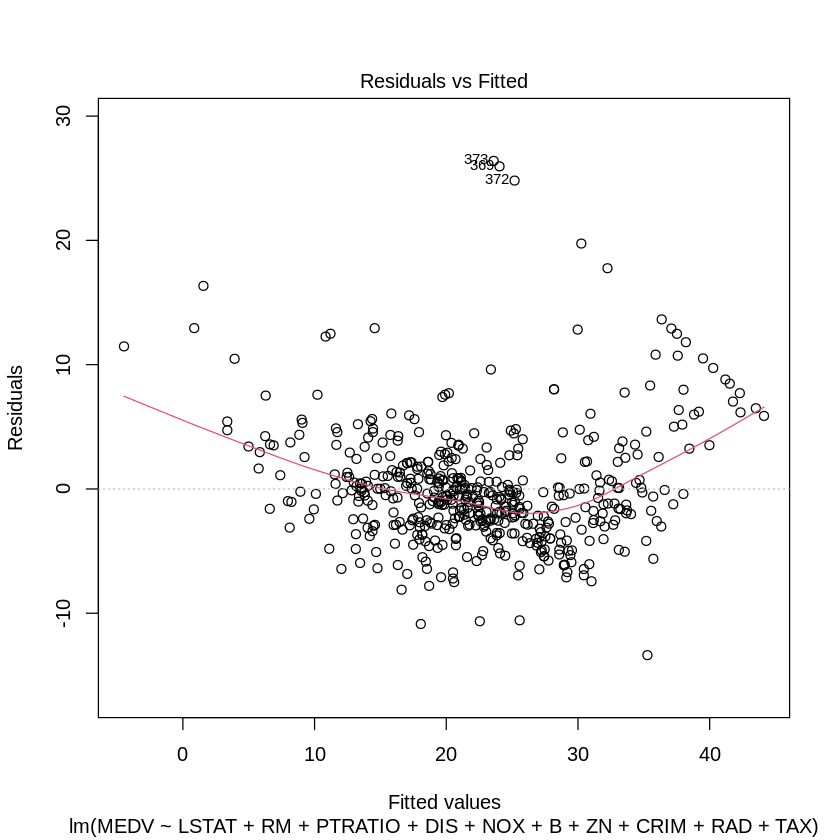

In [66]:
plot(boston_model, which = 1)

In this figure, the red line is our fitted model and the small circles are the residuals (also known as prediction error as they are the difference between an observed value and the predicted value).

The residuals of the regression model are randomly scattered in the plot. Even though there are some outliers there is no signficant systematic trend in the overall scattering.